# <center>Machine Learning Sample Project - Prosper Loans</center>
<center>Nova School of Business and Economics, 2022</center>

<span style="color:white">*.*</span>
<center><b>Author:</b></center>

<center>George Mcguigan</center>


![loans](https://d94tn94v8mvlz.cloudfront.net/blog/wp-content/uploads/2018/02/Prosper.png)


---
# Table of Contents

1. [Overview & Business Problem](#Overview-&-Business-Problem)
2. [Data Curation](#Data-Curation)
3. [Exploratory Analysis](#Exploratory-Analysis)
4. [Preparing data for Machine Learning](#Preparing-data-for-Machine-Learning)
5. [Our first model: Logistic Regression](#Our-first-model:-Logistic-Regression)
6. [Implementation of a Pipeline](#Improving-the-Logistic-Regression-Model-with-Pipelines)
7. [Our second model: Random Forest](#Our-second-model:-Random-Forest)
8. [Model Boosting](#Model-Boosting)
9. [Default predictions on Test Data](#Default-predictions-on-Test-Data)
10. [Conclusion](#Conclusion)

# Overview & Business Problem

With over $7$ billion in funded loans, Prosper Platform is America's first peer-to-peer lending marketplace. On Prosper, borrowers apply for personal loans, and investors (individual or institutional) can finance requests ranging from $2000$ to $40000$. Investors might take into account borrowers' credit scores, ratings, and histories, as well as the loan's type. Prosper is in charge of loan servicing, which includes collecting and distributing borrower payments and interest to the loan investors.


Some lenders require that borrowers have good credit to qualify for a personal loan. By contrast, if your credit score is at least 640, which is considered a fair credit score, you might qualify for a personal loan with Prosper—provided you meet other eligibility requirements. Once you qualify, accept a loan offer, and receive final approval, funds may be deposited into your bank account as soon as the next business day. Prosper allows you to apply for a personal loan with a co-borrower. Applying with a co-borrower who has strong credit could help you qualify for a personal loan at a lower interest rate. Prosper only offers two repayment terms: three and five years. If you prefer a longer repayment period, you’ll have to choose another lender. Prosper charges an origination fee ranging from 2.41 to 5% of your total loan amount for processing your loan. This amount is deducted from your loan proceeds. In addition, if you make a late payment, you’ll be charged $15 or 5% of the loan amount, whichever is greater. High maximum APR: Although you might qualify for a Prosper personal loan with a fair credit score, you could end up paying an APR as high as 35.99%.
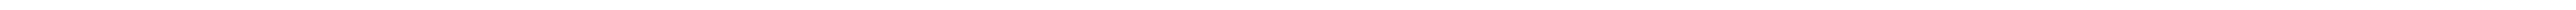


<img src="https://i.ibb.co/cD9hWpt/Schermata-2022-05-13-alle-18-18-17.png" width="400">


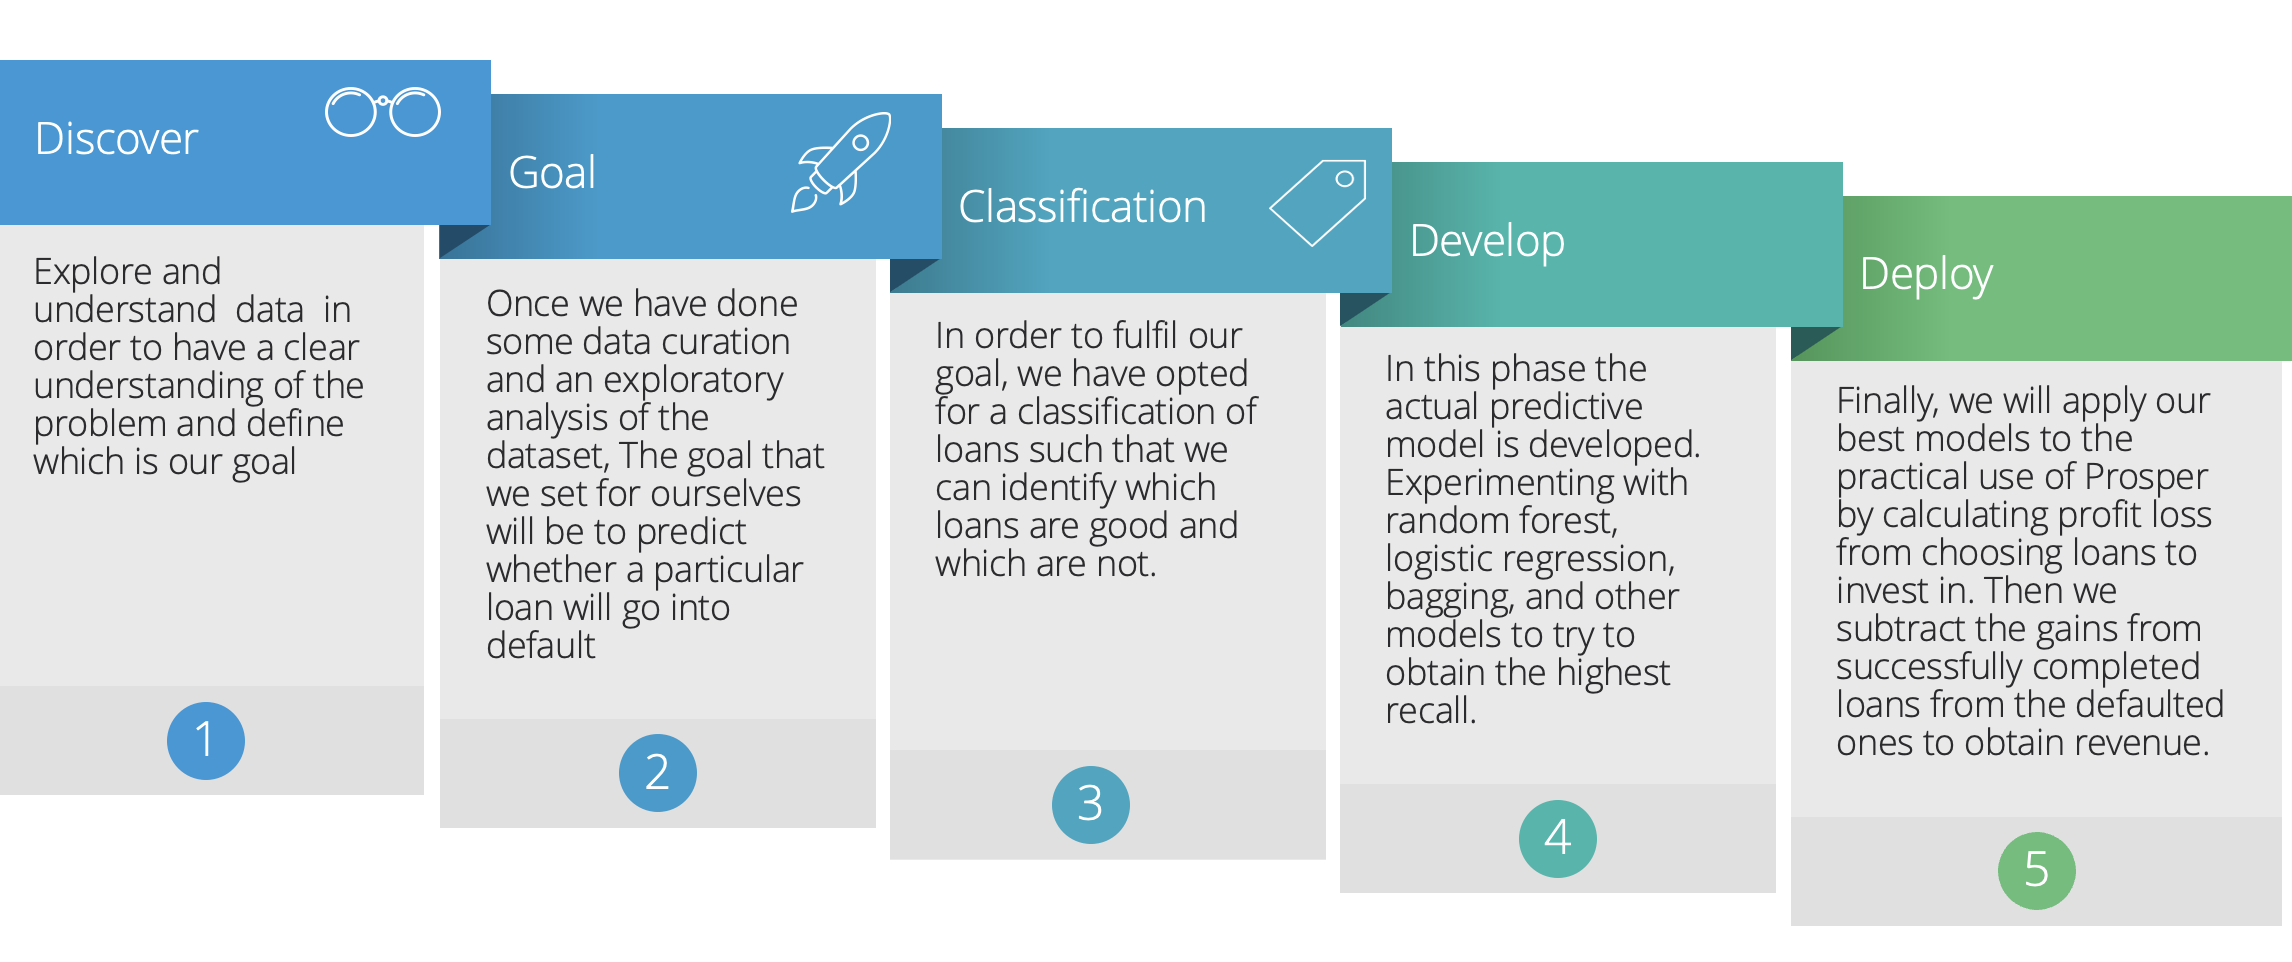

# Initial Imports

In [210]:
#Analysis
import math
import datetime
import numpy as np
import pandas as pd
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

#Graphics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("dark")
sns.set_context({"figure.figsize": (15, 7.5)})

#Processing
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectPercentile

#ML
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import recall_score, precision_score, f1_score, make_scorer

In [211]:
loansDF = pd.read_excel('MachineLearning.xlsx')
pd.set_option("display.max_columns", len(loansDF.columns))
loansDF.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780,640.0,659.0,2001-10-11,5.0,4.0,12.0,1,24000000.0,3.0,3000000.0,2.0,4.720000e+08,4.0,0.0,0.0,0.000000e+00,0.00,1.500000e+09,11000000.0,0.81,0.0,0.17,"$25,000-49,999",True,3.083333e+09,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12,Q3 2007,1F3E3376408759268057EDA,330430000.0,1.139614e+10,9.425000e+09,1.971140e+09,-133180000.0,0.0,0.0,0.0,0.0,1000000.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaT,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7000000.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14.000,680.0,699.0,1996-03-18,14.0,14.0,29.0,13,389000000.0,3.0,5000000.0,0.0,0.000000e+00,0.0,1.0,0.0,3.989000e+09,0.21,1.026600e+10,29000000.0,1000000.00,2000000.0,0.18,"$50,000-74,999",True,6.125000e+09,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03,Q1 2014,1D13370546739025387B2F4,318930000.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,1000000.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060,480.0,499.0,2002-07-27,NaN,NaN,3.0,0,0.0,0.0,1000000.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2.083333e+09,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17,Q1 2007,5F7033715035555618FA612,123320000.0,4.186630e+09,3.001000e+09,1.185630e+09,-24200000.0,0.0,0.0,0.0,0.0,1000000.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaT,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9000000.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32.000,800.0,819.0,1983-02-28,5.0,5.0,29.0,7,115000000.0,0.0,1000000.0,4.0,1.005600e+10,14.0,0.0,0.0,1.444000e+09,0.04,3.075400e+10,26000000.0,0.76,0.0,0.15,"$25,000-49,999",True,2.875000e+09,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01,Q4 2012,9ADE356069835475068C6D2,321450000.0,5.143200e+09,4.091090e+09,1.052110e+09,-108010000.0,0

In [212]:
loansDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   ListingKey                           113937 non-null  object        
 1   ListingNumber                        113937 non-null  int64         
 2   ListingCreationDate                  113937 non-null  object        
 3   CreditGrade                          28953 non-null   object        
 4   Term                                 113937 non-null  int64         
 5   LoanStatus                           113937 non-null  object        
 6   ClosedDate                           55089 non-null   datetime64[ns]
 7   BorrowerAPR                          113912 non-null  float64       
 8   BorrowerRate                         113937 non-null  float64       
 9   LenderYield                          113937 non-null  float64       
 

1. There are variables with far too many null values 

2. Many of these are variables that do not appear to be particularly influential for our analysis

3. There are 13 type object variables. Those requires further attention for an eventual classification models.

4. Variables probably need re-scaling.

5. 'ClosedDate' has to be changed from datetime64 to object 

6. 'FirstRecordedCreditLine' has to be changed from datetime64 to object 

# Data Curation



**Dealing with missing values**

In [213]:
loansDF['ClosedDate'] = loansDF['ClosedDate'].dt.strftime('%Y-%m-%d')

In [214]:
loansDF['FirstRecordedCreditLine'] = loansDF['FirstRecordedCreditLine'].dt.strftime('%Y-%m-%d')

In [215]:
categorical = loansDF.select_dtypes(include=["object"]).columns.values
loansDF[categorical] = loansDF[categorical].fillna("Unknown")

loansDF.select_dtypes(exclude=[np.number]).isnull().sum()

ListingKey                 0
ListingCreationDate        0
CreditGrade                0
LoanStatus                 0
ClosedDate                 0
ProsperRating (Alpha)      0
BorrowerState              0
Occupation                 0
EmploymentStatus           0
IsBorrowerHomeowner        0
CurrentlyInGroup           0
GroupKey                   0
DateCreditPulled           0
FirstRecordedCreditLine    0
IncomeRange                0
IncomeVerifiable           0
LoanKey                    0
LoanOriginationDate        0
LoanOriginationQuarter     0
MemberKey                  0
dtype: int64

Some loans are missing an APR. The APR is simply the borrower's rate plus tax. We therefore calculate the median difference between the two by adding the borrower's rate to our data points that are missing an APR.

In [216]:
borrower_fees = loansDF["BorrowerAPR"] - loansDF["BorrowerRate"]
borrower_fees.median()

0.025019999999999987

In [217]:
loansDF["BorrowerAPR"].fillna(loansDF["BorrowerRate"] + borrower_fees.median(), inplace=True)

loansDF["BorrowerAPR"].isnull().sum()

0

The variable "EstimatedEffectiveYield" is the borrower's rate minus some expected losses (e.g. interest charges). 

In [218]:
loss_estimated_fees = loansDF["BorrowerRate"] - loansDF["EstimatedEffectiveYield"]
loss_estimated_fees.median()

0.01915

In [219]:
loansDF["EstimatedEffectiveYield"].fillna(loansDF["BorrowerRate"] - loss_estimated_fees.median(), inplace=True)

loansDF["EstimatedEffectiveYield"].isnull().sum()

0

Let's consider the median of "EstimatedLoss" for the purposes of the next calculation

In [220]:
loansDF["EstimatedLoss"].fillna(loansDF["EstimatedLoss"].median(), inplace=True)

loansDF["EstimatedLoss"].isnull().sum()

0

"EstimatedReturn' is simply the difference between 'EstimatedEffectiveYield' and 'EstimatedLoss'.

In [221]:
loansDF["EstimatedReturn"].fillna(loansDF["EstimatedEffectiveYield"] - loansDF["EstimatedLoss"], inplace=True)

loansDF["EstimatedReturn"].isnull().sum()

0

It is better to replace the values of "ProsperRating (numeric)" and "ProsperScore" with median values. 

In [222]:
loansDF["ProsperRating (numeric)"].fillna(loansDF["ProsperRating (numeric)"].median(), inplace=True)
loansDF["ProsperScore"].fillna(loansDF["ProsperScore"].median(), inplace=True)


loansDF["ProsperRating (numeric)"].isnull().sum(), loansDF["ProsperScore"].isnull().sum()

(0, 0)

Some variables that may be useful for a possible classification model are missing a small number of values. It is therefore better to delete rows with missing values rather than fill them with 0 or median values.

In [223]:
loansDF.dropna(subset=["EmploymentStatusDuration", "CreditScoreRangeLower", "FirstRecordedCreditLine", "CurrentCreditLines",
                  "TotalCreditLinespast7years"], inplace=True)

In [224]:
loansDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106290 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   ListingKey                           106290 non-null  object        
 1   ListingNumber                        106290 non-null  int64         
 2   ListingCreationDate                  106290 non-null  object        
 3   CreditGrade                          106290 non-null  object        
 4   Term                                 106290 non-null  int64         
 5   LoanStatus                           106290 non-null  object        
 6   ClosedDate                           106290 non-null  object        
 7   BorrowerAPR                          106290 non-null  float64       
 8   BorrowerRate                         106290 non-null  float64       
 9   LenderYield                          106290 non-null  float64       
 

The variables that remain with the highest number of null values are: "DebtToIncomeRatio"; "ScorexChangeAtTimeOfListing"; "LoanFirstDefaultedCycleNumber" and all variables concerning the debtor's Prosper history.

1. "LoanFirstDefaultedCycle" will probably be eliminated during the dimensionality reduction process as it is not very useful for our analysis.
2. Regarding all the variables concerning the debtor's Prosper history" we will replace the missing values with 0 to give an idea of the lack in the history
3. "DebtToIncomeRatio" could be a very useful variable for our analysis. It might be worth trying to reconstruct the missing values.
4. "ScorexChangeAtTimeOfListing" could also be a very interesting variable, so it might be worth taking a more detailed look at it here as well.

We start dealing with the variable "DebtToIncomeRatio"

In [225]:
loansDF_null_debtincome = loansDF[loansDF["DebtToIncomeRatio"].isnull()]

loansDF_null_debtincome[:5]

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
40,10A43601079743929992413,1167746,2014-01-27 12:02:57.523000000,Unknown,60,Current,Unknown,0.19630,0.1725,0.1625,0.15163,0.0724,0.07923,4.0,C,4000000.0,1,WA,Other,Self-employed,276.0,False,False,Unknown,2014-01-25 10:47:25.000,680.0,699.0,1985-12-20,10.0,9.0,28.0,10,1.233000e+09,0.0,2000000.0,0.0,0.0,0.0,0.0,0.0,6.128400e+10,0.46,6.916600e+10,28000000.0,1000000.00,2000000.0,NaN,"$100,000+",False,1.275000e+10,91A33705770133108E299C1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,2,129161,15000,2014-01-29,Q1 2014,ACFF370458072043753CE79,374810000.0,3.748100e+08,1.621400e+08,2.126700e+08,-12330000.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1000000.0,0,0,0.0,3
69,0F37360159310530849DA23,1162592,2014-01-25 12:07:54.537000000,Unknown,60,Current,Unknown,0.13636,0.1139,0.1039,0.09989,0.0349,0.06499,6.0,A,11000000.0,1,IL,Investor,Self-employed,12.0,True,True,Unknown,2014-01-25 11:51:41.000,700.0,719.0,1995-08-01,5.0,5.0,21.0,3,3.730000e+08,0.0,2000000.0,0.0,0.0,0.0,0.0,0.0,1.996100e+10,0.79,5.039000e+09,21000000.0,1000000.00,0.0,NaN,"$25,000-49,999",False,2.700000e+09,B08137048491184083D747A,3.0,16.0,16.0,0.0,0.0,7.861000e+09,2.000000e-02,NaN,0,NaN,2,128889,9000,2014-01-29,Q1 2014,87D0340317005703964722E,197440000.0,1.946315e+08,1.159900e+08,7.864150e+07,-7150000.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1000000.0,0,0,0.0,1
78,0DFE3425061927556BB8A75,359657,2008-06-29 23:23:40.157000000,A,36,Chargedoff,2009-04-09,0.18454,0.1700,0.1600,0.15085,0.0724,0.07845,4.0,Unknown,6000000.0,3,CA,Realtor,Full-time,68.0,True,False,Unknown,2008-06-29 23:13:04.860,720.0,739.0,1995-11-29,14.0,14.0,26.0,9,9.620000e+08,4.0,11000000.0,0.0,0.0,0.0,0.0,0.0,3.357200e+10,0.73,9.355000e+09,24000000.0,1000000.00,1000000.0,NaN,$0,False,0.000000e+00,B8483424568930207C77772,1.0,6.0,6.0,0.0,0.0,7.750000e+09,6.725840e+09,0.0,1918,9.0,68,33852,4800,2008-07-08,Q3 2008,D77734052911579724BCDD5,171130000.0,6.845200e+08,4.183800e+08,2.661400e+08,-15660000.0,0.0,4.381620e+09,4.381620e+09,0.000000e+00,1000000.0,0,0,0.0,115
100,0F67356860455769574096F,704916,2013-01-25 11:48:26.040000000,Unknown,36,Chargedoff,2013-08-30,0.35356,0.3134,0.3034,0.27600,0.1575,0.11850,1.0,HR,3000000.0,13,CA,Other,Not employed,12.0,False,False,Unknown,2013-01-11 12:10:13.000,720.0,739.0,2000-09-10,3.0,3.0,10.0,3,5.600000e+07,0.0,2000000.0,0.0,0.0,0.0,0.0,0.0,5.641000e+09,0.22,1.935900e+10,4000000.0,1000000.00,1000000.0,NaN,Not

In [226]:
loansDF.loc[40]

ListingKey                           10A43601079743929992413
ListingNumber                                        1167746
ListingCreationDate            2014-01-27 12:02:57.523000000
CreditGrade                                          Unknown
Term                                                      60
                                           ...              
PercentFunded                                      1000000.0
Recommendations                                            0
InvestmentFromFriendsCount                                 0
InvestmentFromFriendsAmount                              0.0
Investors                                                  3
Name: 40, Length: 81, dtype: object

In [227]:
loansDF.loc[40, "MonthlyLoanPayment"], loansDF.loc[40, "StatedMonthlyIncome"]

(374810000.0, 12750000000.0)

In [228]:
loansDF_null_debtincome = loansDF[loansDF["DebtToIncomeRatio"].isnull()]

loansDF_null_debtincome["MonthlyLoanPayment"].isnull().sum(), loansDF_null_debtincome["StatedMonthlyIncome"].isnull().sum()

(0, 0)

In [229]:
loansDF_null_debtincome["IncomeVerifiable"][:10]

40     False
69     False
78     False
100    False
103    False
105    False
108    False
125    False
131    False
170    False
Name: IncomeVerifiable, dtype: bool

The idea is to calculate the debt to income ratio based on the stated monthly income, and to allow verifiable income to work as a feature that quantifies the risk that income is overstated.

In [230]:
loansDF["DebtToIncomeRatio"].fillna(loansDF["MonthlyLoanPayment"] / (loansDF["StatedMonthlyIncome"] + 1), inplace = True)

loansDF["DebtToIncomeRatio"].isnull().sum()

0

Let's deal now with the variable "ScorexChangeAtTimeOfListing"

For the purpose of building our model it would be interesting to see if there is a correlation between the increase/decrease in credit score and default. However, in our dataset most loans do not have a value in this variable. It makes no sense to replace null values with 0 because it would hijack our model by showing a resulting existence of a constant score.

In [231]:
loansDF.drop("ScorexChangeAtTimeOfListing", axis=1, inplace=True)

Regarding all the variables concerning the debtor's Prosper history" we will replace the missing values with 0 to give an idea of the lack in the history

In [232]:
prosper_variables = ["TotalProsperLoans","TotalProsperPaymentsBilled", "OnTimeProsperPayments", "ProsperPaymentsLessThanOneMonthLate",
                "ProsperPaymentsOneMonthPlusLate", "ProsperPrincipalBorrowed", "ProsperPrincipalOutstanding"]

loansDF[prosper_variables] = loansDF[prosper_variables].fillna(0)

loansDF.isnull().sum()

ListingKey                     0
ListingNumber                  0
ListingCreationDate            0
CreditGrade                    0
Term                           0
                              ..
PercentFunded                  0
Recommendations                0
InvestmentFromFriendsCount     0
InvestmentFromFriendsAmount    0
Investors                      0
Length: 80, dtype: int64

Now remains to deal with the variable "LoanFirstDefaultedCycle". This will now be done with in Dimensionality Reduction. 

**Dimensionality Reduction**

Let's start by dropping some purely administrative columns that are completely unnecessary for our analysis 

In [233]:
loansDF.drop(["ListingKey", "ListingNumber", "LoanKey", "LoanNumber"], axis=1, inplace=True)

We now proceed to drop variables which would certainly be interesting for different analyses but which would make ours too complicated, moving us away from our objective. 

In [234]:
loansDF.drop(["ListingCreationDate", "ClosedDate", "DateCreditPulled", "LoanOriginationDate", "LoanOriginationQuarter", "MemberKey"], axis=1, inplace=True)

In [235]:
loansDF.drop(["LoanCurrentDaysDelinquent", "LoanFirstDefaultedCycleNumber", "LoanMonthsSinceOrigination", "LP_CustomerPayments",
         "LP_CustomerPrincipalPayments", "LP_InterestandFees", "LP_ServiceFees", "LP_CollectionFees", "LP_GrossPrincipalLoss",
         "LP_NetPrincipalLoss", "LP_NonPrincipalRecoverypayments"], axis=1, inplace=True)

In [236]:
loansDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106290 entries, 0 to 113936
Data columns (total 59 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   CreditGrade                          106290 non-null  object 
 1   Term                                 106290 non-null  int64  
 2   LoanStatus                           106290 non-null  object 
 3   BorrowerAPR                          106290 non-null  float64
 4   BorrowerRate                         106290 non-null  float64
 5   LenderYield                          106290 non-null  float64
 6   EstimatedEffectiveYield              106290 non-null  float64
 7   EstimatedLoss                        106290 non-null  float64
 8   EstimatedReturn                      106290 non-null  float64
 9   ProsperRating (numeric)              106290 non-null  float64
 10  ProsperRating (Alpha)                106290 non-null  object 
 11  ProsperScore 

Before delving into the exploratory analysis, we must focus on the main object of our investigation, namely default. In this sense it is absolutely appropriate to change the variable "LoanSatus" to binary, so as to exclude loans that are currently in progress. The very next step will be to observe how the default behaves in relation to the other variables. 

In [237]:
loansDF["LoanStatus"].value_counts()

Current                   56566
Completed                 33530
Chargedoff                10632
Defaulted                  3289
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     1
Name: LoanStatus, dtype: int64

In [238]:
loansDF["LoanStatus"][:20]

0                Completed
1                  Current
3                  Current
4                  Current
5                  Current
6                  Current
7                  Current
8                  Current
9                  Current
10                 Current
11               Completed
12    Past Due (1-15 days)
13                 Current
14                 Current
15               Defaulted
16                 Current
18                 Current
19                 Current
20                 Current
21               Completed
Name: LoanStatus, dtype: object

In [239]:
loansDF_Past = loansDF[loansDF["LoanStatus"] != "Current"]

loansDF_Past["LoanStatus"].value_counts()

Completed                 33530
Chargedoff                10632
Defaulted                  3289
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     1
Name: LoanStatus, dtype: int64

**Defintion of Loan Status transformation (0's and 1's)**

This is where I decide which of the 11 Loan Statuses I should label as default and which ones I should label as non-default. Therefore, loans that are labeled as defaulted, charged off or past 30 days due are labeled as a 1 and completed, final payment in progress, cancelled, and loans that are only 1-30 days past due are labelled as a 0. 

In [240]:
loansDF_Past["LoanStatus"].replace({"Defaulted" :1 , "Past Due (1-15 days)": 0,
                                    "Past Due (31-60 days)": 1, "Past Due (61-90 days)": 1,
                                    "Past Due (91-120 days)": 1, "Past Due (16-30 days)" : 0,
                                    "Past Due (>120 days)": 1, "Chargedoff": 1,
                                    "Completed" : 0, "FinalPaymentInProgress": 0, "Cancelled": 0}, inplace = True)
                                    
loansDF_Past["LoanStatus"].value_counts()

0    34807
1    14917
Name: LoanStatus, dtype: int64

(0.0, 1.0)

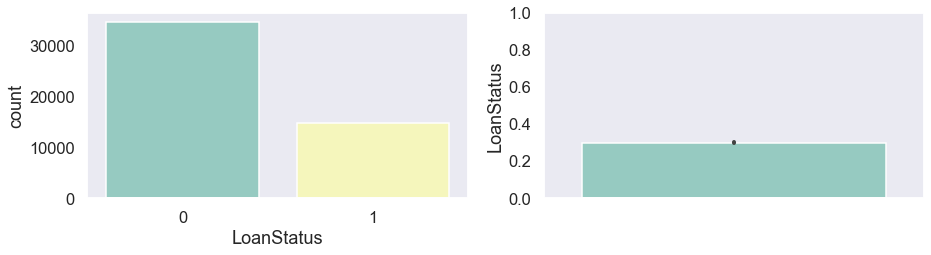

In [241]:
chart = plt.figure()

axis1 = chart.add_subplot(221)
sns.countplot(loansDF_Past["LoanStatus"])

axis2 = chart.add_subplot(222)
sns.barplot(y=loansDF_Past["LoanStatus"]).set_ylim([0,1])

In [242]:
loansDF_Past["LoanStatus"].mean(), 1 - loansDF_Past["LoanStatus"].mean()

(0.29999597779744186, 0.7000040222025581)


**Findings:**

In order to build a model that can predict when a loan will default, it is necessary to distinguish between successful loans and those that are in default. The problem is that the data on current loans do not provide any useful insight for our analysis, as they are still outstanding and we do not know the outcome. For simplification, we have assumed that "cancelled" and "past due" loans are to be considered as defaults. This allows us to simply have a binary option between completed loan and defaulted loan, i.e. 1 and 0. 

Looking at our data, the first observation is that 70% of the loans are completed, while the remaining 30% are in default (although one must always remember that this category also includes cancelled and past due loans). 

# Exploratory Analysis



In [243]:
loansDF_Past.describe()

,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,LoanOriginalAmount,MonthlyLoanPayment,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,49724.000000,49724.000000,49724.000000,49724.000000,49724.000000,49724.000000,49724.000000,49724.000000,49724.000000,4.972400e+04,49724.000000,49724.000000,49724.000000,49724.000000,49724.000000,49724.000000,49724.000000,49724.000000,4.972400e+04,49724.000000,4.972400e+04,49724.000000,4.972400e+04,49724.000000,49724.000000,49724.000000,4.972400e+04,4.972400e+04,4.972400e+04,4.972400e+04,49724.000000,4.972400e+04,4.972400e+04,4.972400e+04,49724.000000,49724.000000,49724.000000,49724.000000,49724.000000,4.972400e+04,4.972400e+04,49724.000000,4.972400e+04,49724.00000,49724.000000,49724.000000,4.972400e+04,49724.00000
mean,37.383316,0.299996,0.227630,0.203470,0.193209,0.171487,0.084773,0.099849,3.795129,6.098906e+06,2.846553,81.636172,682.712171,701.712171,9.586819,8.366242,25.789578,6.411210,3.476842e+08,1.798287,6.556894e+06,0.643914,1.066158e+09,4.143170,0.311178,0.023369,1.569520e+10,4.474468e+04,1.076571e+10,2.184454e+07,348423.805878,9.070469e+05,5.167269e+06,5.122985e+09,0.301364,4.558624,4.412779,0.134040,0.011705,1.617444e+09,5.433205e+08,6527.303495,2.327748e+08,990889.71859,0.099228,0.051022,3.708327e+07,109.01818
std,8.200240,0.458260,0.089797,0.082468,0.082052,0.079151,0.042269,0.058222,1.365905,1.759049e+06,3.595906,85.135799,66.713278,66.713278,5.570450,4.980212,14.263379,4.454619,4.505542e+08,2.739781,7.182246e+06,2.000398,6.717699e+09,10.026401,0.744631,0.179542,3.380213e+10,2.223944e+05,2.192606e+10,1.241407e+07,476475.302479,1.235013e+06,4.719504e+07,5.695265e+09,0.645141,11.410502,11.066557,1.105551,0.258911,4.286493e+09,1.886612e+09,5270.558892,1.862452e+08,95012.93780,0.476979,0.344454,4.437511e+08,111.41890
min,12.000000,0.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000e+06,0.000000,0.000000,520.000000,539.000000,0.000000,0.000000,2.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1000.000000,0.000000e+00,0.70000,0.000000,0.000000,0.000000e+00,1.00000
25%,36.000000,0.000000,0.153240,0.136400,0.125600,0.110200,0.072400,0.060300,3.000000,6.000000e+06,1.000000,21.000000,640.000000,659.000000,6.000000,5.000000,15.000000,3.000000,7.800000e+07,0.000000,2.000000e+06,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.647000e+09,2.200000e-01,5.120000e+08,1.300000e+07,0.770000,0.000000e+00,1.200000e-01,2.916667e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,3000.000000,1.069900e+08,1000000.00000,0.000000,0.000000,0.000000e+00,33.00000
50%,36.000000,0.000000,0.222370,0.199000,0.188000,0.160850,0.072400,0.102500,4.000000,6.000000e+06,1.000000,53.000000,680.000000,699.000000,9.000000,8.000000,24.000000,6.000000,2.090000e+08,1.000000,5.000000e+06,0.000000,0.000000e+00,0.000000,0.000000,0.000000,6.113500e+09,5.700000e-01,3.231000e+09,2.000000e+07,0.920000,1.00

**Informations and analysis of Categories:**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51]),
 [Text(0, 0, 'CO'),
  Text(1, 0, 'Unknown'),
  Text(2, 0, 'AL'),
  Text(3, 0, 'FL'),
  Text(4, 0, 'MI'),
  Text(5, 0, 'IL'),
  Text(6, 0, 'NY'),
  Text(7, 0, 'CA'),
  Text(8, 0, 'NE'),
  Text(9, 0, 'KS'),
  Text(10, 0, 'VA'),
  Text(11, 0, 'GA'),
  Text(12, 0, 'MN'),
  Text(13, 0, 'MD'),
  Text(14, 0, 'WI'),
  Text(15, 0, 'OH'),
  Text(16, 0, 'PA'),
  Text(17, 0, 'WA'),
  Text(18, 0, 'NJ'),
  Text(19, 0, 'TX'),
  Text(20, 0, 'SC'),
  Text(21, 0, 'MO'),
  Text(22, 0, 'CT'),
  Text(23, 0, 'KY'),
  Text(24, 0, 'AZ'),
  Text(25, 0, 'OK'),
  Text(26, 0, 'OR'),
  Text(27, 0, 'NC'),
  Text(28, 0, 'AR'),
  Text(29, 0, 'TN'),
  Text(30, 0, 'NM'),
  Text(31, 0, 'DC'),
  Text(32, 0, 'ID'),
  Text(33, 0, 'WV'),
  Text(34, 0, 'NV'),
  Text(35, 0, 'MT'),
  Text(

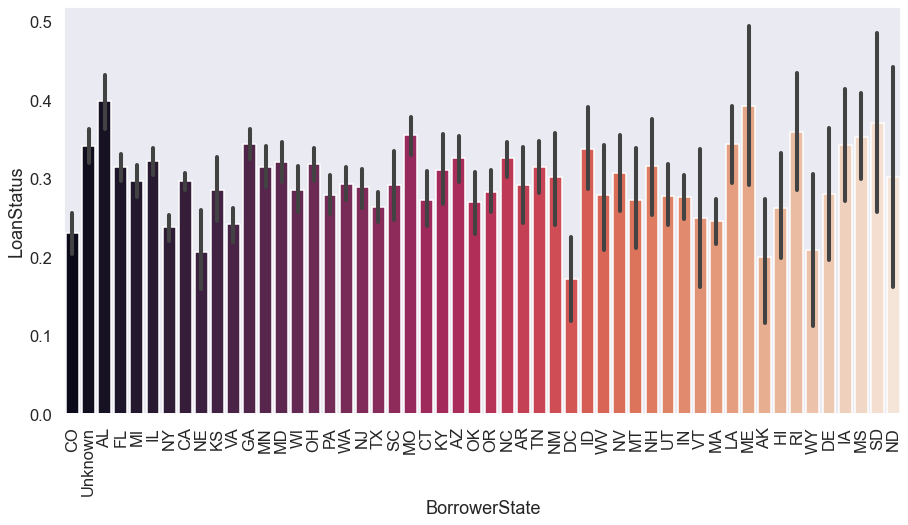

In [244]:
sns.barplot(x="BorrowerState", y="LoanStatus", data = loansDF_Past, palette = 'rocket')
plt.xticks(rotation=90)

Interpretation: Bar chart showing the loan status by borrower state. Since loans that defaulted in the past are labeled as a 1, and completed loans as a 0, then the lower the mean Loan Status is of a state, the lower risk of default is in that particular state. 

In [245]:
AL, DC = loansDF_Past[loansDF_Past["BorrowerState"] == "AL"], loansDF_Past[loansDF_Past["BorrowerState"] == "DC"]

AL["LoanStatus"].mean(), DC["LoanStatus"].mean()

(0.39923954372623577, 0.17204301075268819)

In Alabama loans defaulted 40% while in Washington D.C only 17%, basically the half. Could indicate an important variable to consider for our classficiation models later on. 

We make the categorical variable "ListingCategory (numeric)" easier to manage by simply replacing the numeric values with the category names.

In [246]:
loansDF_Past.replace(to_replace={"ListingCategory (numeric)": {0: "Unknown", 1: "Debt", 2: "Reno", 3: "Business", 4: "Personal",
                                                                5: "Student", 6: "Auto", 7: "Other", 8: "Baby", 9: "Boat", 
                                                                10: "Cosmetic", 11: "Engagement", 12: "Green", 13: "Household",
                                                                14: "LargePurchase", 15: "Medical", 16: "Motorcycle", 17: "RV",
                                                                18: "Taxes", 19: "Vacation", 20: "Wedding"}}, inplace=True)

loansDF_Past.rename(index=str, columns={"ListingCategory (numeric)": "ListingCategory"}, inplace=True)

loansDF_Past["ListingCategory"][:10]

0       Unknown
11      Unknown
12         Debt
15    Household
21      Unknown
23      Medical
26         Debt
27         Debt
30      Wedding
33        Other
Name: ListingCategory, dtype: object

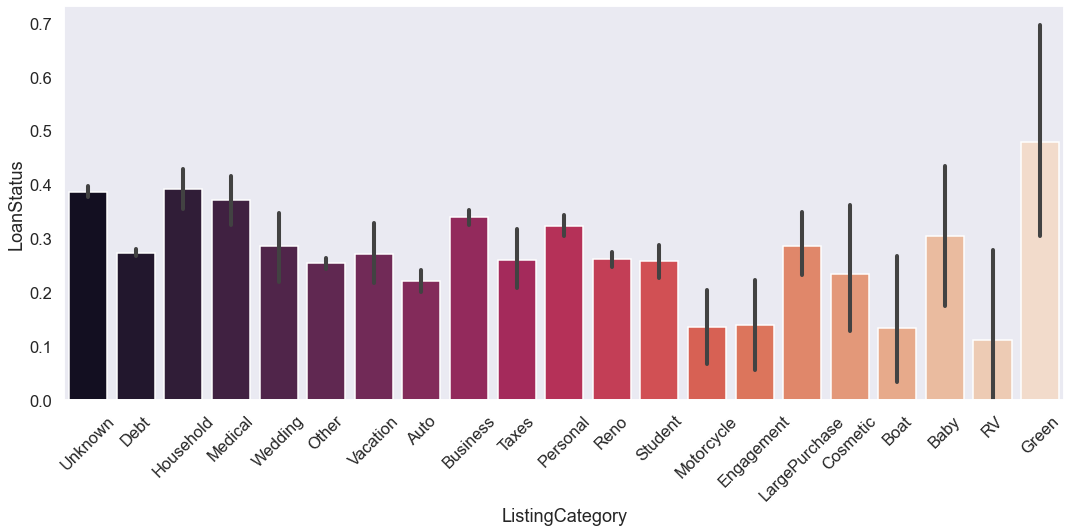

In [247]:
sns.barplot(x="ListingCategory", y="LoanStatus", data=loansDF_Past, palette = 'rocket')
plt.xticks(rotation=45)
plt.tight_layout()

In [248]:
RV, Green = loansDF_Past[loansDF_Past["ListingCategory"] == "RV"], loansDF_Past[loansDF_Past["ListingCategory"] == "Green"]

RV["LoanStatus"].mean(), Green["LoanStatus"].mean()

(0.1111111111111111, 0.4782608695652174)

Interestingly, green loans have the highest default rate (47% of the loans on average) , while the lowest are RVs, Boats, and Motorcycles (11% on average). Another indicator, that the type of loan could be an important variable for our classication model to consider. 

**Analysis of Financial Information**

(0.0, 400.0)

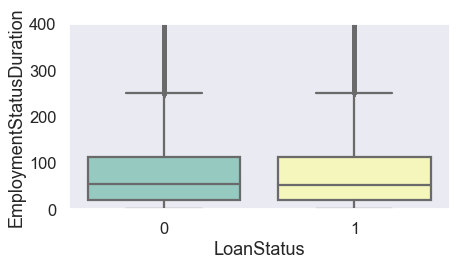

In [249]:
chart = plt.figure()
axis1 = chart.add_subplot(222)
sns.boxplot(x="LoanStatus", y="EmploymentStatusDuration", data=loansDF_Past).set_ylim([0,400])

In [250]:
x = loansDF_Past["EmploymentStatusDuration"]
y = loansDF_Past["LoanStatus"]

r, p = st.pearsonr(x, y)

print("Correlation between employment status duration and loan default is {}. P-value is {}".format(r, p))

Correlation between employment status duration and loan default is -0.004664013460740836. P-value is 0.29833886745186877


No significant correlation, so we drop this column

In [251]:
loansDF_Past.drop("EmploymentStatusDuration", axis=1, inplace=True)

<AxesSubplot:xlabel='EmploymentStatus', ylabel='LoanStatus'>

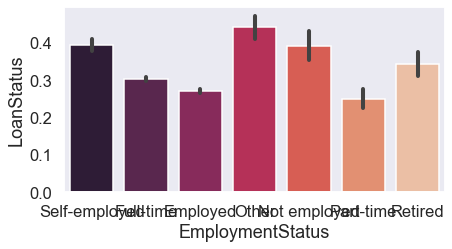

In [252]:
chart = plt.figure()
axis2 = chart.add_subplot(221)
sns.barplot(x="EmploymentStatus", y="LoanStatus", data = loansDF_Past, palette = 'rocket')

There seems to be a relationship between "EmploymentStatus" and the default rate.

(0.0, 0.8)

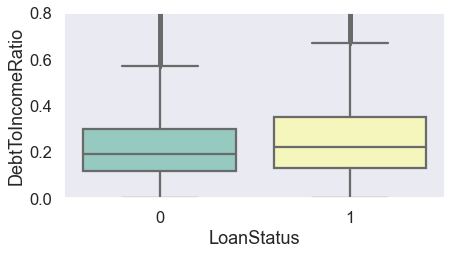

In [253]:
chart = plt.figure()

axis4 = chart.add_subplot(222)
sns.boxplot(x="LoanStatus", y="DebtToIncomeRatio", data=loansDF_Past).set_ylim([0,0.8])

Of course loans default more probably with an higher ratio of debt to income

(0.0, 1.0)

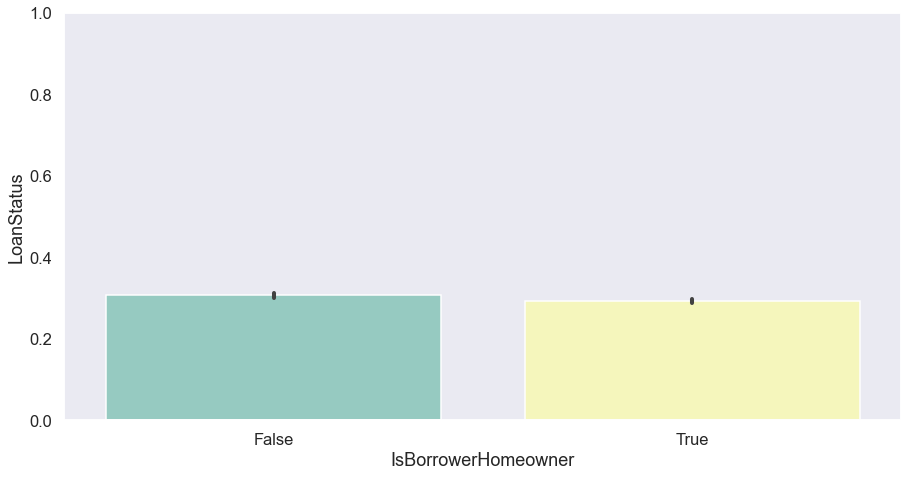

In [254]:
chart = plt.figure()

sns.barplot(x="IsBorrowerHomeowner", y="LoanStatus", data=loansDF_Past).set_ylim([0,1])


No particular relationship between default and being or not an homeowner

**Credit Scores**

<AxesSubplot:xlabel='ProsperRating (numeric)', ylabel='LoanStatus'>

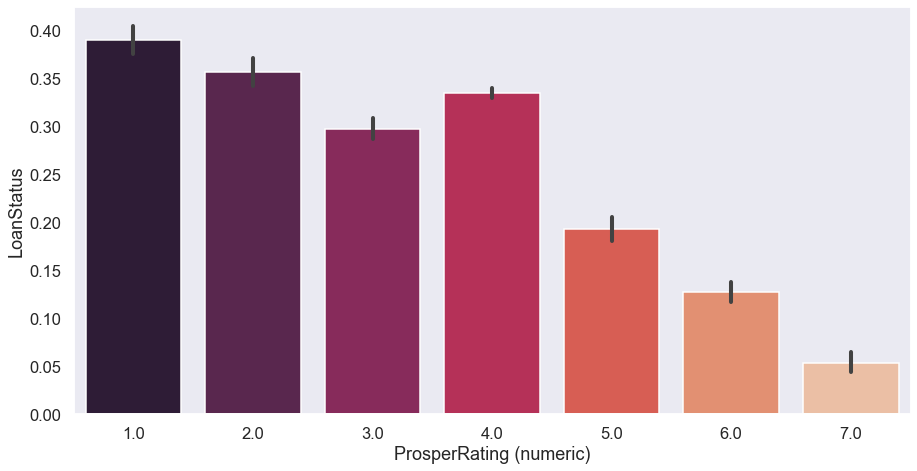

In [255]:
sns.barplot(x="ProsperRating (numeric)", y="LoanStatus", data=loansDF_Past, palette = 'rocket')

<AxesSubplot:xlabel='ProsperScore', ylabel='LoanStatus'>

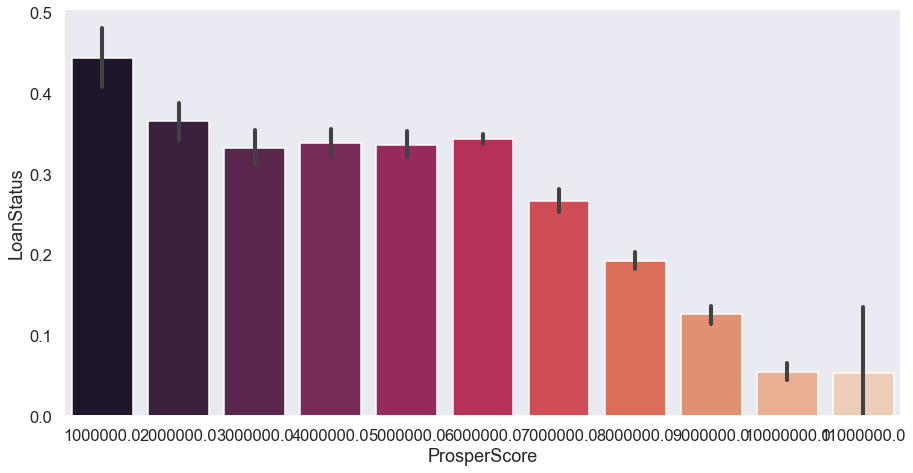

In [256]:
sns.barplot(x="ProsperScore", y = "LoanStatus", data = loansDF_Past, palette = 'rocket')

<AxesSubplot:xlabel='CreditScoreRangeLower', ylabel='LoanStatus'>

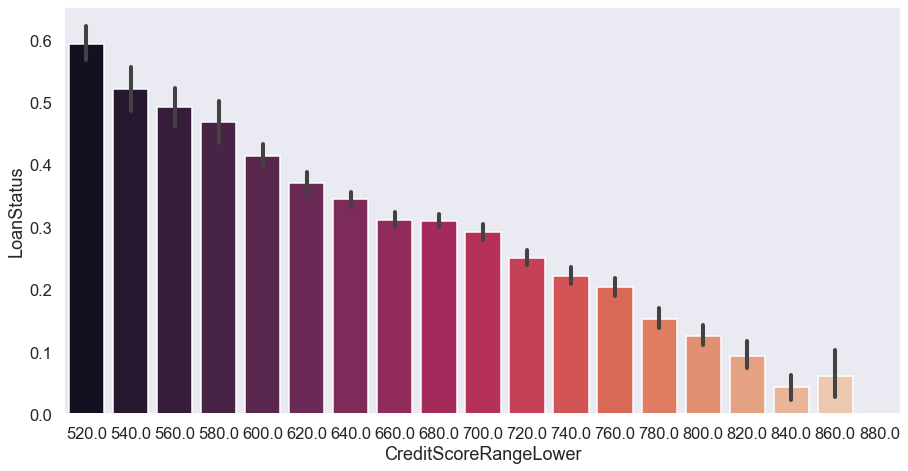

In [257]:
sns.barplot(x="CreditScoreRangeLower", y="LoanStatus", data=loansDF_Past, palette = 'rocket')

<AxesSubplot:xlabel='CreditScoreRangeUpper', ylabel='LoanStatus'>

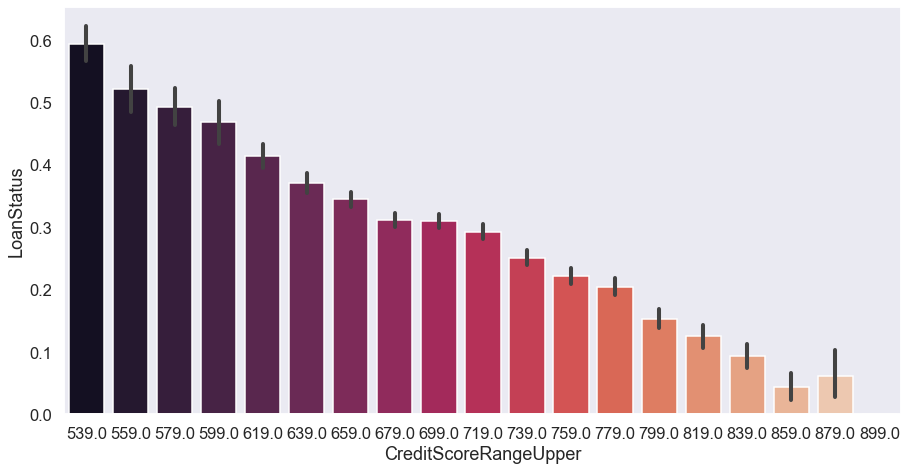

In [258]:
sns.barplot(x="CreditScoreRangeUpper", y="LoanStatus", data=loansDF_Past, palette = 'rocket')

Both the ProsperScore and Credit Score clearly show that a higher score leads to a lower probability of default. It is interesting to note that in the second ProsperScore graph, the loan with the highest ProsperScore still has a higher probability of default than the previous two.

After observing a constant range, in view of the next analysis we will drop "CreditScoreRangeUpper" and simply rename "CreditScoreRangeLower" to "CreditScore". This allows us to eliminate the redundancy present. 

In [259]:
creditrange = loansDF_Past["CreditScoreRangeUpper"] - loansDF_Past["CreditScoreRangeLower"]

creditrange.value_counts()

19.0    49724
dtype: int64

In [260]:
loansDF_Past.drop("CreditScoreRangeUpper", axis=1, inplace=True)
loansDF_Past.rename(index=str, columns={"CreditScoreRangeLower": "CreditScore"}, inplace = True)

**Interests Rate**

<AxesSubplot:xlabel='CreditScore', ylabel='BorrowerRate'>

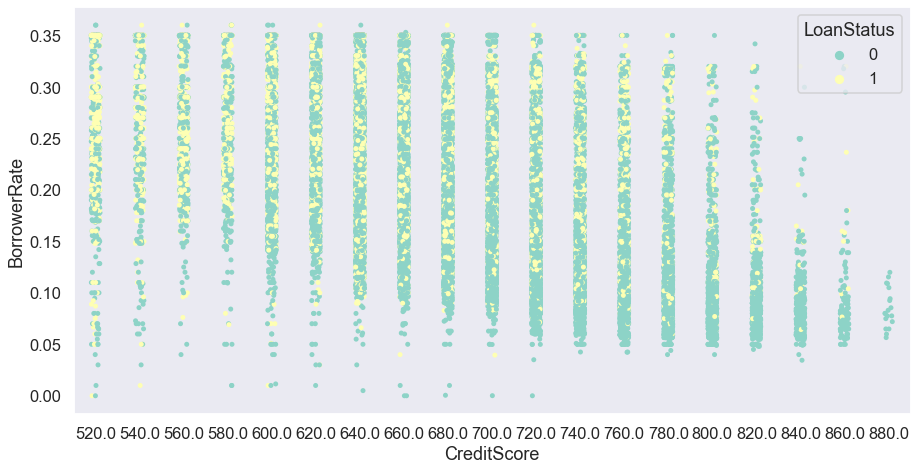

In [261]:
sns.stripplot(x="CreditScore", y='BorrowerRate', hue='LoanStatus', data=loansDF_Past)

<AxesSubplot:xlabel='CreditScore', ylabel='BorrowerRate'>

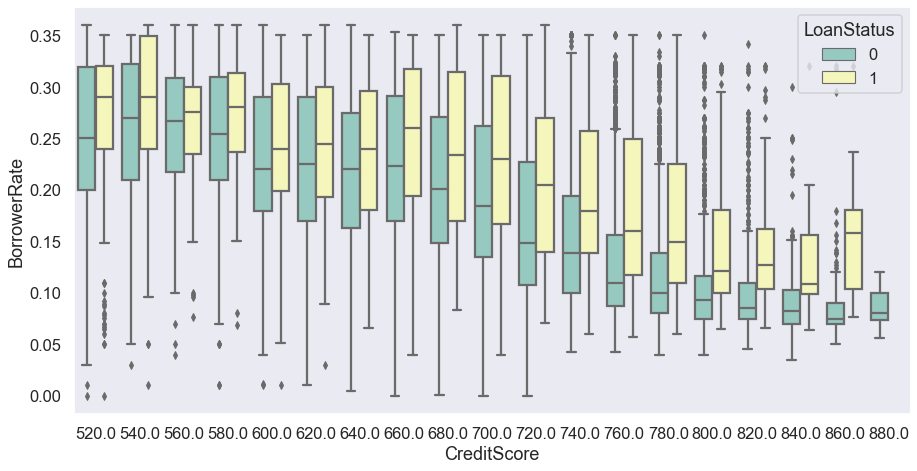

In [262]:
sns.boxplot(x="CreditScore", y='BorrowerRate', hue='LoanStatus', data=loansDF_Past)

<AxesSubplot:xlabel='ProsperScore', ylabel='BorrowerRate'>

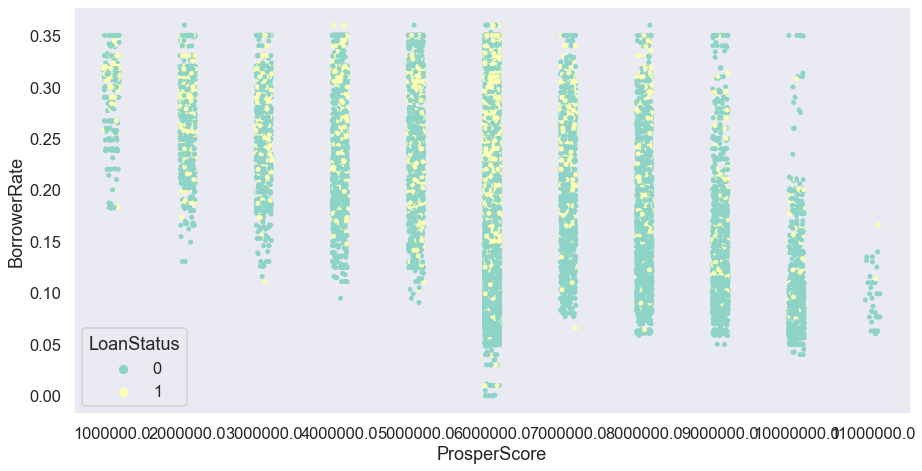

In [263]:
sns.stripplot(x="ProsperScore", y='BorrowerRate', hue='LoanStatus', data=loansDF_Past)

<AxesSubplot:xlabel='ProsperScore', ylabel='BorrowerRate'>

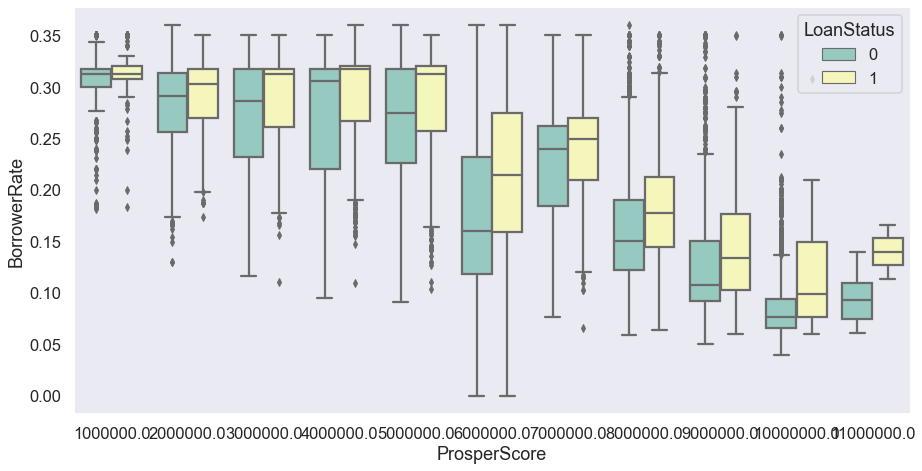

In [264]:
sns.boxplot(x="ProsperScore", y='BorrowerRate', hue='LoanStatus', data=loansDF_Past)

As one would expect, the graphs above show that the loans most likely to default are those with the combination of high interest rates and low credit or prosper scores.

**Dimensionality Reduction 2**

In [265]:
loansDF_Past.describe()

,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,CreditScore,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,LoanOriginalAmount,MonthlyLoanPayment,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,49724.000000,49724.000000,49724.000000,49724.000000,49724.000000,49724.000000,49724.000000,49724.000000,49724.000000,4.972400e+04,49724.000000,49724.000000,49724.000000,49724.000000,49724.000000,4.972400e+04,49724.000000,4.972400e+04,49724.000000,4.972400e+04,49724.000000,49724.000000,49724.000000,4.972400e+04,4.972400e+04,4.972400e+04,4.972400e+04,49724.000000,4.972400e+04,4.972400e+04,4.972400e+04,49724.000000,49724.000000,49724.000000,49724.000000,49724.000000,4.972400e+04,4.972400e+04,49724.000000,4.972400e+04,49724.00000,49724.000000,49724.000000,4.972400e+04,49724.00000
mean,37.383316,0.299996,0.227630,0.203470,0.193209,0.171487,0.084773,0.099849,3.795129,6.098906e+06,682.712171,9.586819,8.366242,25.789578,6.411210,3.476842e+08,1.798287,6.556894e+06,0.643914,1.066158e+09,4.143170,0.311178,0.023369,1.569520e+10,4.474468e+04,1.076571e+10,2.184454e+07,348423.805878,9.070469e+05,5.167269e+06,5.122985e+09,0.301364,4.558624,4.412779,0.134040,0.011705,1.617444e+09,5.433205e+08,6527.303495,2.327748e+08,990889.71859,0.099228,0.051022,3.708327e+07,109.01818
std,8.200240,0.458260,0.089797,0.082468,0.082052,0.079151,0.042269,0.058222,1.365905,1.759049e+06,66.713278,5.570450,4.980212,14.263379,4.454619,4.505542e+08,2.739781,7.182246e+06,2.000398,6.717699e+09,10.026401,0.744631,0.179542,3.380213e+10,2.223944e+05,2.192606e+10,1.241407e+07,476475.302479,1.235013e+06,4.719504e+07,5.695265e+09,0.645141,11.410502,11.066557,1.105551,0.258911,4.286493e+09,1.886612e+09,5270.558892,1.862452e+08,95012.93780,0.476979,0.344454,4.437511e+08,111.41890
min,12.000000,0.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000e+06,520.000000,0.000000,0.000000,2.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1000.000000,0.000000e+00,0.70000,0.000000,0.000000,0.000000e+00,1.00000
25%,36.000000,0.000000,0.153240,0.136400,0.125600,0.110200,0.072400,0.060300,3.000000,6.000000e+06,640.000000,6.000000,5.000000,15.000000,3.000000,7.800000e+07,0.000000,2.000000e+06,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.647000e+09,2.200000e-01,5.120000e+08,1.300000e+07,0.770000,0.000000e+00,1.200000e-01,2.916667e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,3000.000000,1.069900e+08,1000000.00000,0.000000,0.000000,0.000000e+00,33.00000
50%,36.000000,0.000000,0.222370,0.199000,0.188000,0.160850,0.072400,0.102500,4.000000,6.000000e+06,680.000000,9.000000,8.000000,24.000000,6.000000,2.090000e+08,1.000000,5.000000e+06,0.000000,0.000000e+00,0.000000,0.000000,0.000000,6.113500e+09,5.700000e-01,3.231000e+09,2.000000e+07,0.920000,1.000000e+06,2.000000e-01,4.250000e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,5000.000000,1.737100e+08,1000000.00000,0.000000,0.000000,0.000000e+00,73.00000
75%,36.000000,1.000000,0.305130,0.270000,0.259900,0.236400,0.100000,0.136300,4.000000

Before delving into the Business Problem discussion and preprocessing our data to start building a Machine Learning model, we feel it is appropriate to drop further columns that:
1. Are not useful to our analysis
2. Make our dataset too heavy.
3. They are too complicated to be used later in our analysis 

In [266]:
loansDF_Past.drop(["CreditGrade", "BorrowerAPR", "LenderYield", "EstimatedEffectiveYield", "EstimatedLoss", "EstimatedReturn",
                 "ProsperRating (Alpha)", "Occupation", "CurrentlyInGroup", "GroupKey", "IncomeRange", "PercentFunded"], axis=1,
                inplace=True)

loansDF_Past.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49724 entries, 0 to 113935
Data columns (total 45 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Term                                 49724 non-null  int64  
 1   LoanStatus                           49724 non-null  int64  
 2   BorrowerRate                         49724 non-null  float64
 3   ProsperRating (numeric)              49724 non-null  float64
 4   ProsperScore                         49724 non-null  float64
 5   ListingCategory                      49724 non-null  object 
 6   BorrowerState                        49724 non-null  object 
 7   EmploymentStatus                     49724 non-null  object 
 8   IsBorrowerHomeowner                  49724 non-null  bool   
 9   CreditScore                          49724 non-null  float64
 10  FirstRecordedCreditLine              49724 non-null  object 
 11  CurrentCreditLines              

# Preparing data for Machine Learning

In [267]:
loansDF_Past["IsBorrowerHomeowner"] = loansDF_Past["IsBorrowerHomeowner"].astype(int)
loansDF_Past["IncomeVerifiable"] = loansDF_Past["IncomeVerifiable"].astype(int)

loansDF_Past["IsBorrowerHomeowner"][:10], loansDF_Past["IncomeVerifiable"][:10]

(0     1
 11    0
 12    0
 15    1
 21    0
 23    0
 26    0
 27    1
 30    0
 33    0
 Name: IsBorrowerHomeowner, dtype: int32,
 0     1
 11    1
 12    1
 15    1
 21    1
 23    1
 26    1
 27    1
 30    1
 33    1
 Name: IncomeVerifiable, dtype: int32)

In [268]:
firstyearcredit = loansDF_Past["FirstRecordedCreditLine"].str[:4]

loansDF_Past["YearsCredit"] = 2014 - pd.to_numeric(firstyearcredit)

loansDF_Past.drop("FirstRecordedCreditLine", axis=1, inplace=True)

loansDF_Past["YearsCredit"] 

0         13
11        14
12        18
15        15
21        11
          ..
113927    42
113928    10
113929     6
113933    22
113935    21
Name: YearsCredit, Length: 49724, dtype: int64

In [269]:
category = pd.get_dummies(loansDF_Past["ListingCategory"])

loansDF_Past = loansDF_Past.join(category, rsuffix="_category")
loansDF_Past.drop("ListingCategory", axis=1, inplace=True)

loansDF_Past.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49724 entries, 0 to 113935
Data columns (total 65 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Term                                 49724 non-null  int64  
 1   LoanStatus                           49724 non-null  int64  
 2   BorrowerRate                         49724 non-null  float64
 3   ProsperRating (numeric)              49724 non-null  float64
 4   ProsperScore                         49724 non-null  float64
 5   BorrowerState                        49724 non-null  object 
 6   EmploymentStatus                     49724 non-null  object 
 7   IsBorrowerHomeowner                  49724 non-null  int32  
 8   CreditScore                          49724 non-null  float64
 9   CurrentCreditLines                   49724 non-null  float64
 10  OpenCreditLines                      49724 non-null  float64
 11  TotalCreditLinespast7years      

In [270]:
employment = pd.get_dummies(loansDF_Past["EmploymentStatus"])

loansDF_Past = loansDF_Past.join(employment, rsuffix="_employmentstatus")
loansDF_Past.drop("EmploymentStatus", axis=1, inplace=True)

loansDF_Past.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49724 entries, 0 to 113935
Data columns (total 71 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Term                                 49724 non-null  int64  
 1   LoanStatus                           49724 non-null  int64  
 2   BorrowerRate                         49724 non-null  float64
 3   ProsperRating (numeric)              49724 non-null  float64
 4   ProsperScore                         49724 non-null  float64
 5   BorrowerState                        49724 non-null  object 
 6   IsBorrowerHomeowner                  49724 non-null  int32  
 7   CreditScore                          49724 non-null  float64
 8   CurrentCreditLines                   49724 non-null  float64
 9   OpenCreditLines                      49724 non-null  float64
 10  TotalCreditLinespast7years           49724 non-null  float64
 11  OpenRevolvingAccounts           

In [271]:
default = loansDF_Past.groupby("BorrowerState")["LoanStatus"].mean()

lowrisk = sorted(default)[51]
mediumlowrisk = sorted(default)[40]
mediumrisk = sorted(default)[29]
mediumhighrisk = sorted(default)[19]
highrisk = sorted(default)[9]

Ngeo = {}

for state in default.index:
    if mediumhighrisk > default[state]:
        v = 5
    elif mediumrisk > default[state] >= mediumhighrisk:
        v = 4
    elif mediumlowrisk > default[state] >= mediumrisk:
        v = 3
    elif lowrisk > default[state] >= mediumlowrisk:
        v = 2
    else:
        v = 1
    Ngeo[state] = v

loansDF_Past.replace(to_replace={"BorrowerState": Ngeo}, inplace=True)
                               
loansDF_Past["BorrowerState"][:10]

##########################################################################

0     5
11    2
12    1
15    3
21    4
23    3
26    5
27    5
30    4
33    3
Name: BorrowerState, dtype: int64

In [272]:
state = pd.get_dummies(loansDF_Past["BorrowerState"])

loansDF_Past = loansDF_Past.join(state, rsuffix="_state")
loansDF_Past.drop("BorrowerState", axis=1, inplace=True)

loansDF_Past.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49724 entries, 0 to 113935
Data columns (total 75 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Term                                 49724 non-null  int64  
 1   LoanStatus                           49724 non-null  int64  
 2   BorrowerRate                         49724 non-null  float64
 3   ProsperRating (numeric)              49724 non-null  float64
 4   ProsperScore                         49724 non-null  float64
 5   IsBorrowerHomeowner                  49724 non-null  int32  
 6   CreditScore                          49724 non-null  float64
 7   CurrentCreditLines                   49724 non-null  float64
 8   OpenCreditLines                      49724 non-null  float64
 9   TotalCreditLinespast7years           49724 non-null  float64
 10  OpenRevolvingAccounts                49724 non-null  int64  
 11  OpenRevolvingMonthlyPayment     

# First model: Logistic Regression

For my first model I am building a baseline logistic regression model where we will split the data into a training and test set. The model will learn based off the training and be used to predict the values that were withheld from the model (aka the indices of the test set). Afterwards I will check the performance of our model to see how accurately it predicts whether a client will default. 

For future models I will build a datapipeline for numerical and categorical variables in order to feed the model additional information so that it can better classify clients that are likely to default on their loans. 

In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
X = loansDF_Past.drop("LoanStatus", axis=1)
y = loansDF_Past["LoanStatus"]


X being the training set, having dropped our target variable (Loan Status). y being the test set, where the only information we need to keep is the target variable. 

In [79]:
test_size = len(y)
repaid = len(y)- sum(y)
default = sum(y)
print(f"Total: {test_size}. Repaid: {repaid}, Default: {default}")

Total: 49724. Repaid: 34807, Default: 14917


In [80]:
X

,Term,BorrowerRate,ProsperRating (numeric),ProsperScore,IsBorrowerHomeowner,CreditScore,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeVerifiable,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,LoanOriginalAmount,MonthlyLoanPayment,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,YearsCredit,Auto,Baby,Boat,Business,Cosmetic,Debt,Engagement,Green,Household,LargePurchase,Medical,Motorcycle,Other,Personal,RV,Reno,Student,Taxes,Unknown,Vacation,Wedding,Employed,Full-time,Not employed,Other_employmentstatus,Part-time,Retired,Self-employed,1,2,3,4,5
0,36,0.1580,4.0,6000000.0,1,640.0,5.0,4.0,12.0,1,24000000.0,3.0,3000000.0,2.0,4.720000e+08,4.0,0.0,0.0,0.000000e+00,0.00,1.500000e+09,11000000.0,0.81,0.0,0.17,1,3.083333e+09,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,9425,330430000.0,0,0,0.0,258,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
11,36,0.1325,4.0,6000000.0,0,640.0,2.0,2.0,10.0,1,40000000.0,3.0,5000000.0,3.0,2.224000e+09,1.0,0.0,0.0,1.220000e+09,0.32,2.580000e+09,7000000.0,0.40,0.0,0.27,1,1.666667e+09,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,1000,33810000.0,0,0,0.0,53,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
12,36,0.1435,5.0,4000000.0,0,680.0,9.0,7.0,29.0,8,290000000.0,1.0,4000000.0,0.0,0.000000e+00,0.0,0.0,0.0,8.624000e+09,0.70,3.626000e+09,20000000.0,1000000.00,0.0,0.18,1,2.416667e+09,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,4000,137390000.0,0,0,0.0,1,18,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
15,36,0.3177,1.0,5000000.0,1,700.0,10.0,9.0,18.0,5,300000000.0,0.0,1000000.0,0.0,0.000000e+00,0.0,1.0,0.0,9.103000e+09,0.97,1.780000e+08,17000000.0,0.94,0.0,0.49,1,5.500000e+09,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,4000,173710000.0,0,0,0.0,10,15,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
21,36,0.2075,4.0,6000000.0,0,620.0,4.0,4.0,13.0,3,15000000.0,0.0,8000000.0,1.0,5.200000e+09,5.0,1.0,0.0,1.340000e+08,0.08,1.366000e+09,6000000.0,0.37,0.0,0.09,1,3.750000e+09,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,3000,112640000.0,0,0,0.0,53,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113927,36,0.0679,4.0,6000000.0,1,760.0,10.0,8.0,18.0,7,763000000.0,1.0,9000000.0,0.0,0.000000e+00,0.0,0.0,0.0,8.996100e+10,0.72,3.441500e+10,17000000.0,1000000.00,1000000.0,0.06,1,1.033333e+10,1.0,6.0,6.0,0.0,0.0,1.000000e+09,8.476100e+08,4292,132110000.0,2,0,0.0,194,42,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
113928,36,0.1899,4.0,6000000.0,0,740.0,4.0,3.0,15.0,2,7000000.0,0.0,2000000.0,0.0,0.000000e+00,0.0,0.0,0.0,4.000000e+06,0.00,3.746000e+09,15000000.0,1000000.00,0.0,0.27,1,2.333333e+09,5.0,47.0,47.0,0.0,0.0,1.425000e+10,2.000000e-02,2000,73300000.0,0,0,0.0,25,10,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
113929,36,0.2639,2.0,3000000.0,0,660.0,7.0,7.0,14.0,7,135000000.0,2.0,19000000.0,0.0,0.000000e+00,9.0,0.0,0.0,1.109000e+09,0.11,7.537000e+09,11000000.0,0.75,1000000.0,0.05,1,4.333333e+09,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,2500,101250000.0,0,0,0.0,26,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0

In [81]:
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

Below, we split the dataset into 80% training and 20% testing. 

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

y_prediction = softmax_reg.predict(X_test)

              precision    recall  f1-score   support

           0       0.71      0.98      0.82      6990
           1       0.53      0.06      0.10      2955

    accuracy                           0.70      9945
   macro avg       0.62      0.52      0.46      9945
weighted avg       0.66      0.70      0.61      9945



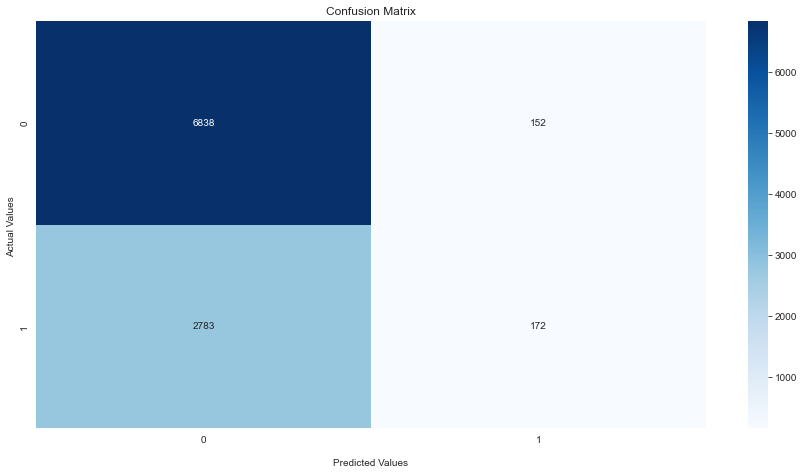

In [83]:
print(classification_report(y_test, y_prediction))

import seaborn as sns

cf_matrix = confusion_matrix(y_test, y_prediction)

ax = sns.heatmap(cf_matrix, annot=True, fmt='.0f', cmap='Blues')

ax.set_title('Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Display the visualization of the Confusion Matrix.
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")
plt.show()

The most important metric for evaluating the performance of the model is recall (or the false positive rate). In this context of this analysis, those would be the loans that were predicted to be completed but actually went into default. This model  has a disappointing low recall score of 6% as the model only predicted 172/(2783+172) correctly. The overall accuracy of the model, 70% is a misleading statistic as the model seems to overpredict loans as being completed so the high overall accuracy is explained away by the 6,838 correct classifications of completed loans. 

# Improving the Logistic Regression Model with Pipelines

In [84]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector
from sklearn.impute import SimpleImputer


numeric_features = X.select_dtypes(include=np.number).columns
 
numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_features = X.select_dtypes(exclude=["number","bool_","object_"],).columns
categorical_pipeline = OneHotEncoder(handle_unknown='ignore')


full_pipeline = ColumnTransformer([
        ("num", numeric_pipeline, numeric_features),
        ("cat", categorical_pipeline, categorical_features)], remainder='passthrough', sparse_threshold=0)

full_pipeline

ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                  transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 Index([                               'Term',
                              'BorrowerRate',
                   'ProsperRating (numeric)',
                              'ProsperScore',
                       'IsBorrowerHomeowner',
                               'CreditScore',
                        'CurrentCreditLines',
                           'OpenCreditLines',
                'TotalCreditLinespast7years',
                     'Ope...
                                'Engagement',
                                     'Green',
                                 'Household',
                             'LargePurchase',
          

In [85]:
X_train_prep = full_pipeline.fit_transform(X_train)
X_train_prep.shape

(39779, 74)

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

log_model_pipe = Pipeline([
    ('preprocessor', full_pipeline),
    ('logistic', LogisticRegression(solver="liblinear", penalty="l2", random_state=42))
])

log_model_pipe
log_model_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index([                               'Term',
                              'BorrowerRate',
                   'ProsperRating (numeric)',
                              'ProsperScore',
                       'IsBorrowerHomeowner',
                               'CreditScore',
                        'CurrentCreditLines',
                           'OpenCreditLines',
                '...
                                     'Other',


In [87]:
from sklearn.neighbors import KNeighborsClassifier
k_range = list(range(1, 25))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_test, y_test, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.6081455567576313, 0.6777274703497367, 0.6430371171754142, 0.6840634763353993, 0.6634512603257738, 0.6874853138934107, 0.6711962225614997, 0.68617645571924, 0.6728020383608182, 0.6916057146901509, 0.6811468812877264, 0.6912022891115537, 0.6839620638403284, 0.6913022860782788, 0.6861745346450563, 0.6947213936887657, 0.6931125446144202, 0.6954256190408785, 0.6936155627230722, 0.6949226009322265, 0.6931128479419228, 0.6958280335278, 0.6920063092120562, 0.6965308433515667]


Text(0, 0.5, 'Cross-Validated-Accuracy')

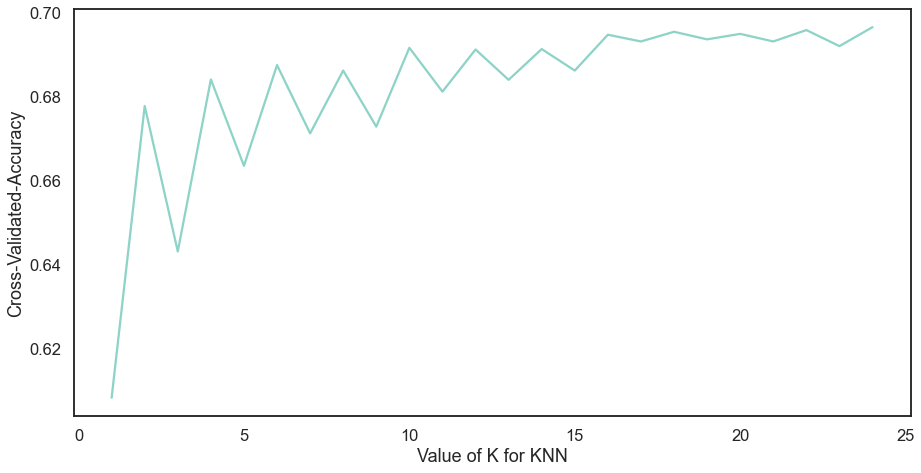

In [88]:
import matplotlib.pyplot as plt

sns.set_style("white")
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated-Accuracy')

              precision    recall  f1-score   support

           0       0.75      0.92      0.83      6990
           1       0.59      0.27      0.37      2955

    accuracy                           0.73      9945
   macro avg       0.67      0.60      0.60      9945
weighted avg       0.70      0.73      0.69      9945



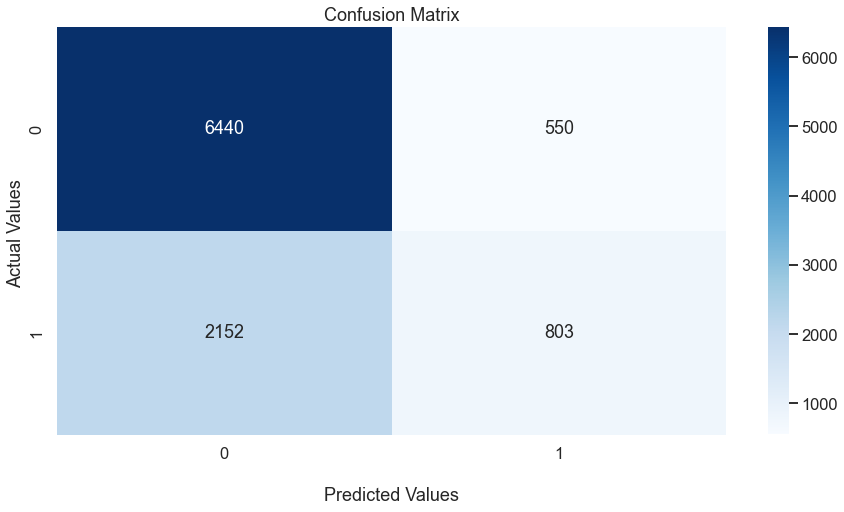

In [89]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import plot_confusion_matrix

y_test_pred = cross_val_predict(log_model_pipe, X_test,
                           y_test, cv=25)

print(classification_report(y_test, y_test_pred))

cf_matrix = confusion_matrix(y_test, y_test_pred)

ax = sns.heatmap(cf_matrix, annot=True, fmt='.0f', cmap='Blues')

ax.set_title('Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Display the visualization of the Confusion Matrix.
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")
plt.show()

Since my goal is to correctly identify as many defaulted loans as possible the recall and the total accuracy are our priority KPIs.

Given the previous Logistic Model data, we created numerical and categorical features in order to implement a pipeline, so we can improve the model performance. Compared to the recall of our first model (6%), our second model has a slightly improved but still underwhelming recall score (27%). The overall accuracy increased slightly from 70% to 73%.



In the next step, I will implent random forest model to see if we can reach better scores for our important metrics.

# Second model: Random Forest

The goal of this project and the application of Machine Learning techniques is to try to accurately classify which loans will default and which loans will actually be repaid. The goal I need to set in this case is to minimize the loans that will go into default. This will obviously lead us to classify some loans as defaults that would actually be fulfilled. This problem is obviously due to the need to maximize the recall metric, so as to avoid classifying loans that in reality will not be fulfilled.

Random Forest belongs to the supervised learning algorithm. Like decision trees, they are also used for classification and regression. A predictor ensemble is built with several decision trees that expand in randomly selected data subspaces.

Using Random Forest over other machine learning algorithms has many advantages like:
1. Immunity to overfitting
2. Accurate classification or regression
3. More efficient on large databases

In [90]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [91]:
pca = PCA(n_components=10)
pca.fit(X_train_scaled)

X_train_pca10 = pca.transform(X_train_scaled)
X_test_pca10 = pca.transform(X_test_scaled)

pca.explained_variance_ratio_

array([0.16577612, 0.0950711 , 0.08796333, 0.08723255, 0.08119706,
       0.07840212, 0.0593768 , 0.04782824, 0.04214654, 0.03365976])

In [92]:
pca = PCA(n_components=3)
pca.fit(X_train)

X_train_pca3 = pca.transform(X_train_scaled)
X_test_pca3 = pca.transform(X_test_scaled)

pca.explained_variance_ratio_

array([0.69588531, 0.24620078, 0.02593483])

In [93]:
X_train50 = SelectPercentile(percentile=50).fit_transform(X_train_scaled, y_train)
X_test50 = SelectPercentile(percentile=50).fit_transform(X_test_scaled, y_test)

X_train10 = SelectPercentile().fit_transform(X_train_scaled, y_train)
X_test10 = SelectPercentile().fit_transform(X_test_scaled, y_test)

**Tuning**

In [94]:
from sklearn.model_selection import GridSearchCV

Performing a grid search to maximize for recall. It takes roughly 20 minutes to run the line of code below. 

In [101]:
recall_basic = make_scorer(recall_score, pos_label=1)

param_grid = {"class_weight": ["balanced", {0: .1, 1: .9}, {0: .2, 1: .8}, {0: .3, 1:.7 }], "min_samples_split": [2, 3, 5, 10, 20]}

random_forest = RandomForestClassifier()
clf = GridSearchCV(random_forest, param_grid=param_grid, scoring=recall_basic)

clf.fit(X_train50, y_train)

clf.best_params_, clf.best_score_

({'class_weight': {0: 0.1, 1: 0.9}, 'min_samples_split': 20},
 0.7602402562099323)

After running through a parameter grid, our Random Forest produced a 76% recall. This is the best performing model to date.

In [102]:
y_test_pred = cross_val_predict(clf, X_test50, y_test, cv=10)

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.58      0.69      6990
           1       0.43      0.74      0.54      2955

    accuracy                           0.63      9945
   macro avg       0.63      0.66      0.61      9945
weighted avg       0.72      0.63      0.64      9945



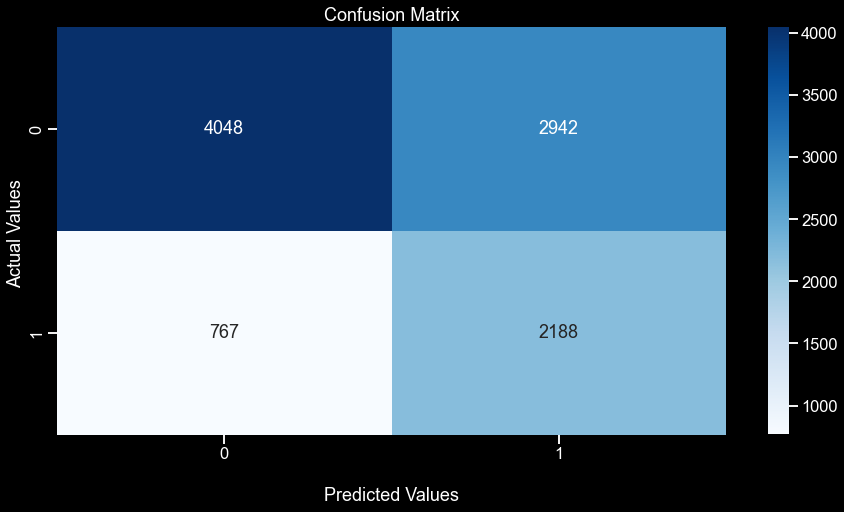

In [103]:
cf_matrix = confusion_matrix(y_test, y_test_pred)

ax = sns.heatmap(cf_matrix, annot=True, fmt='.0f', cmap='Blues')

ax.set_title('Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Display the visualization of the Confusion Matrix.
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")
plt.show()

As we can see from the results, this model produces worse metrics than the models we already implemented (for example the logistic regression pipeline). I can continue to try to improve predictive power by implementing various ways of boosting.

# Model Boosting

**AdaBoost**

In [125]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
abcl = AdaBoostClassifier(n_estimators= 500, learning_rate=1.9, random_state=22)
abcl = abcl.fit(X_train, y_train)
pred_AB =abcl.predict(X_test)
acc_AB = accuracy_score(y_test, pred_AB)
recall_AB = recall_score(y_test, pred_AB)
tempResultsDf = pd.DataFrame({'Method':['Adaboost'], 'accuracy': [acc_AB], 'recall': [recall_AB]})
resultsDf = tempResultsDf
resultsDf

,Method,accuracy,recall
0,Adaboost,0.730216,0.332318


Above we performed an Ada Boosting classifier to see if we could improve upon the Random Forest and basic logistic regression classifiers. The method automatically adjusts its parameters to the data based on the actual performance in the current iteration. Meaning, both the weights for re-weighting the data and the weights for the final aggregation are re-computed iteratively. However, the recall we got was worse than the basic pipeline and as a result we will not be proceeding with this model.

**GradientBoost**

In [126]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 500, learning_rate = 1.9, random_state=22)
gbcl = gbcl.fit(X_train, y_train)
pred_GB =gbcl.predict(X_test)
acc_GB = accuracy_score(y_test, pred_GB)
recall_GB = recall_score(y_test, pred_GB)
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost'], 'accuracy': [acc_GB], 'recall': [recall_GB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,accuracy,recall
0,Adaboost,0.730216,0.332318
0,Gradient Boost,0.647159,0.470051


After Adaboosting, we switched to gradient boosting. Gradient Boosting learns from the mistake — residual error directly, rather than update the weights of data points. This resulted in higher accuracy and recall compared with Adaboost.

**BaggingClassifier**

In [127]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=100, max_samples= .8, bootstrap=True, oob_score=True, random_state=22)
bgcl = bgcl.fit(X_train, y_train)
pred_BG =bgcl.predict(X_test)
acc_BG = accuracy_score(y_test, pred_BG)
recall_BG = recall_score(y_test, pred_BG)
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'accuracy': [acc_BG],'recall': [recall_BG]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy', 'recall']]
resultsDf

,Method,accuracy,recall
0,Adaboost,0.730216,0.332318
0,Gradient Boost,0.647159,0.470051
0,Bagging,0.734942,0.294416


Finally, we tried bagging - training a bunch of individual models in a parallel way. Each model is trained by a random subset of the data. This resulted in the highest accuracy and recall compared with the other two models. We will be moving forward with this approach to calculate profit loss for Prosper.


# Calculating Profit Loss based off Default Predictions

**Random Forest Predictions**

In [132]:
y_test

109437    1
45931     1
51959     0
4234      1
100716    0
         ..
40061     0
10646     0
49013     1
84666     0
70541     0
Name: LoanStatus, Length: 9945, dtype: int64

In [129]:
y_test_pred_df = pd.DataFrame(y_test_pred)

In [133]:
y_test_pred_df.index = y_test.index

In [134]:
y_test_pred_df = y_test_pred_df.rename(columns = {0:'RF predictions'})
y_test_pred_df

,RF predictions
109437,0
45931,1
51959,1
4234,0
100716,1
...,...
40061,1
10646,0
49013,1
84666,1


In [136]:
predictions_PP =y_test_pred_df.join(y_test)
predictions_PP

,RF predictions,LoanStatus
109437,0,1
45931,1,1
51959,1,0
4234,0,1
100716,1,0
...,...,...
40061,1,0
10646,0,0
49013,1,1
84666,1,0


In [137]:
loans_chosen = predictions_PP[predictions_PP["RF predictions"] == 0]

In [138]:
loans_failed = loans_chosen[loans_chosen["LoanStatus"] == 1]
loans_success = loans_chosen[loans_chosen["LoanStatus"] == 0]

len(loans_failed), len(loans_success), len(loans_failed) / (len(loans_success) + len(loans_failed))

(767, 4048, 0.1592938733125649)

In [139]:
lost_money = X_test.loc[loans_failed.index,"LoanOriginalAmount"]

lost_money.sum()

5505871

In [140]:
a = X_test.loc[loans_success.index,"LoanOriginalAmount"]
b = X_test.loc[loans_success.index,"BorrowerRate"]

gained_money = pd.concat([a, b], axis=1)

gained_money["Profit"] = gained_money["LoanOriginalAmount"] * gained_money["BorrowerRate"]

gained_money[:10]

,LoanOriginalAmount,BorrowerRate,Profit
58140,6500,0.2499,1624.35
73359,1500,0.3375,506.25
79487,20000,0.1419,2838.00
3763,7500,0.2199,1649.25
105808,1000,0.0710,71.00
56359,1000,0.0680,68.00
21316,25000,0.1364,3410.00
27418,2500,0.2770,692.50
5820,10000,0.2699,2699.00
492,4000,0.1177,470.80


In [141]:
gained_money["Profit"].sum()

3754068.2942999997

In [142]:
total_losses = gained_money["Profit"].sum() - lost_money.sum()
total_return = total_losses / (gained_money["LoanOriginalAmount"].sum() + lost_money.sum())

total_losses, total_return

(-1751802.7057000003, -0.05648090842169089)

# Conclusion

In conclusion I created three models:

1. Basic Logistic regression
2. Logistic regression with a pipeline
3. Random Forest 
4. Ada Boost
5. Gradient Boost
6. Bagging classifier 

To compare the three models I chose recall as the main metric since we want to find all the customers who will have a defaulted loan. From our results we can see that the best recall for defaulted loans was performed by the tuned Random Forest model (74%). If in reality we would have decided to use the Random Forest model, under the assumption that all loans predicted to be successful (0) would be funded and all those predicted to default (1) would be rejected, we would have lost $1,751,802. This would have gave us a return of -.056%. 

We can clearly say that the model is not ready for an application in the real business world. However we have to keep in mind that these numbers are produced before service fees for creditors and borrowers to exist on the platform, which means in real we would have a smaller loss or maybe even a profit.